In [84]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import random
from collections import Counter

In [85]:
#Creating a population of 5000 units
p_vehicles = range(1,5001)
#Creating a seed value, so we can keep track
random.seed(0)
#Creating a sample
s_vehicles = random.sample(p_vehicles, k=100)

In [86]:
#Getting our data
file = '_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx'
df = pd.read_excel(doc_name,header = 11, sheet_name = 1)

In [87]:
df.head()

,Case number,Sender-id,Type,Total time,Time open,Time pending,Time closed,Number of pending iterations
0,GR0400250011,BSABESBB,AN,29.73,20.80,8.93,0.0,3
1,GR0400250015,BDCCANCU,OX,6.83,5.54,1.29,0.0,2
2,GR0400250022,CITIUS33,NU,6.86,6.86,0.00,0.0,0
3,GR0400250023,BOFMCAM2,NU,6.93,4.77,2.16,0.0,1
4,GR0400250024,BFICCUHH,OX,19.81,0.28,19.52,0.0,4


Text(0.5, 1.0, 'Histogram of Total time')

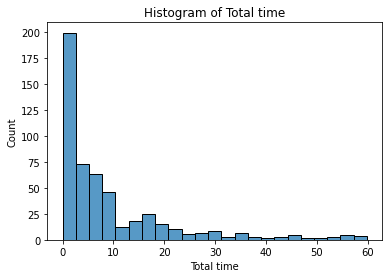

In [88]:
# Creating a histogram with the "TotalTime" column

#df['Total time'].plot(kind='hist') #optional
sns.histplot(df, x = 'Total time')
plt.title('Histogram of Total time')

<AxesSubplot:xlabel='Total time'>

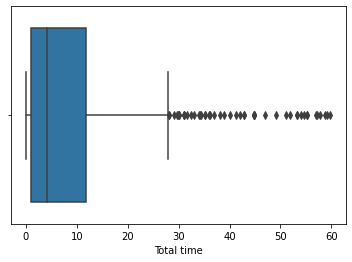

In [89]:
#Creating a boxplot with the "Total time" column
sns.boxplot(x = 'Total time', data = df)

## Exercises

### What are the average and the standard dev of the Total time?

In [90]:
mean= np.mean(df['Total time'])
std = np.std(df['Total time'])
print('Mean : {} \nStd : {}'.format(mean,std))

Mean : 9.422341650671784 
Std : 12.64870921495865


### How many reclaims are handled within 15 days?

In [91]:
df['Total time'].describe()
#Just by looking at this, I can know that 75% of my data is handled withing 11 days

count    521.000000
mean       9.422342
std       12.660866
min        0.000000
25%        1.040000
50%        4.070000
75%       11.850000
max       59.800000
Name: Total time, dtype: float64

In [92]:
#here I can know exactly how many reclaims where handled in 14 or less days.
def count_reclaims(L):
    counter = 0
    for x in L:
        if x<=14:
            counter+=1
    return counter


count_reclaims(df['Total time'].to_list())

404

### Is the distribution Symetrical?

No, is skwee to the right


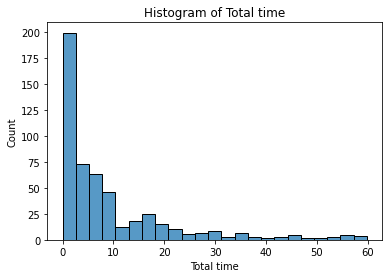

In [93]:
# Creating a histogram with the "TotalTime" column

#df['Total time'].plot(kind='hist') #optional
sns.histplot(df, x = 'Total time')
plt.title('Histogram of Total time')
print('No, is skwee to the right')

### Most repeted type?

([<matplotlib.patches.Wedge at 0x2c55d9a85b0>,
 [Text(1.063230356120408, 0.28203051222176406, 'AN'),
  Text(0.11586084230627104, 1.0938812847928616, 'OX'),
  Text(-0.9979484361335859, 0.4627082437330574, 'NU'),
  Text(-1.0955035193461458, -0.0993581355511909, 'NO'),
  Text(-0.9097513833371577, -0.6183465213908202, 'KK'),
  Text(-0.6535198746037552, -0.884823018178151, 'BD'),
  Text(-0.3298098308894559, -1.0493929080419158, 'DD'),
  Text(0.023213446551606634, -1.0997550344959535, 'BV'),
  Text(0.23367446720088975, -1.0748935963054114, 'WX'),
  Text(0.6902745540815626, -0.8564584286394175, 'BC'),
  Text(0.9586497575043351, -0.539435484962641, 'XX'),
  Text(1.0615103969678077, -0.2884366085108607, 'CT'),
  Text(1.098380554052862, -0.05966706359900881, 'CS'),
  Text(1.0996800454702007, -0.02652918382946982, 'PX'),
  Text(1.099980001605495, -0.006632953186588671, 'N2')])

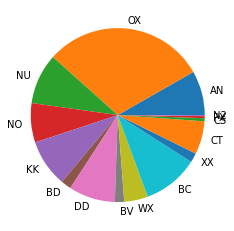

In [94]:
def pie(L):
    C = Counter(L) #By doing this we can have the count of each categorical value
    return plt.pie(labels = C.keys(), x = C.values())
pie(df.Type)